# Plant diseas detection

## Setup

In [1]:
#setup 
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers  import Concatenate
from tensorflow.keras.layers import AveragePooling2D, Dropout, Input, BatchNormalization
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report, confusion_matrix

## Data Preprocessing

In [2]:
#loading image address

img_path = './New Plant Diseases/train'
train_image_path = './New Plant Diseases/train'
test_image_path = './New Plant Diseases/test'
valid_image_path = './New Plant Diseases/valid'

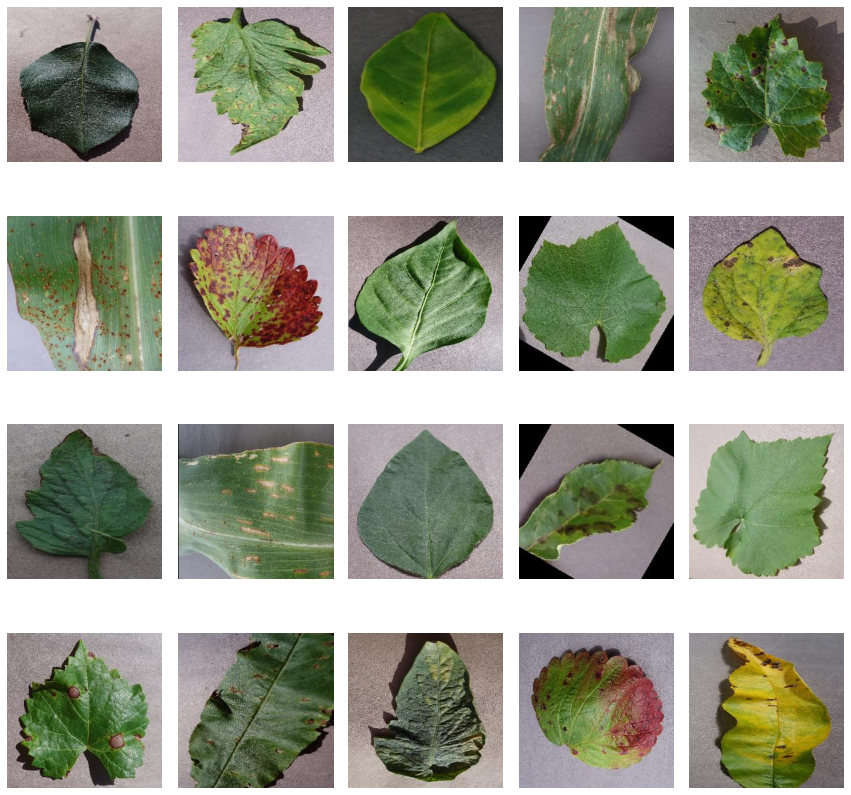

In [3]:
#looking at dataset

plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(20):
    ran_folder = np.random.randint(0,len(os.listdir(img_path)))
    ran_folder_path = os.path.join(img_path, os.listdir(img_path)[ran_folder])
    ran_image = np.random.randint(0,len(os.listdir(ran_folder_path)))
    ran_image_path = os.path.join(ran_folder_path, os.listdir(ran_folder_path)[ran_image])
    image = cv2.imread(ran_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(4,5, i+1)
    plt.imshow(image)
    plt.axis("off")
plt.show()

In [4]:
# Classes names of the plants 
class_name = os.listdir(img_path)
print(class_name)
print("Number of classes : {}".format(len(class_name)))

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [5]:
# #of images in each class
number_of_img={}
for cn in class_name:
    number_of_img[cn]=len(os.listdir(img_path+"/"+cn))
    img_each_class = pd.DataFrame(number_of_img.values(), index=number_of_img.keys(), columns=["number of images"])
print(img_each_class.sum())
img_each_class

number of images    70295
dtype: int64


,number of images
Apple___Apple_scab,2016
Apple___Black_rot,1987
Apple___Cedar_apple_rust,1760
Apple___healthy,2008
Blueberry___healthy,1816
Cherry_(including_sour)___healthy,1826
Cherry_(including_sour)___Powdery_mildew,1683
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,1642
Corn_(maize)___Common_rust_,1907
Corn_(maize)___healthy,1859


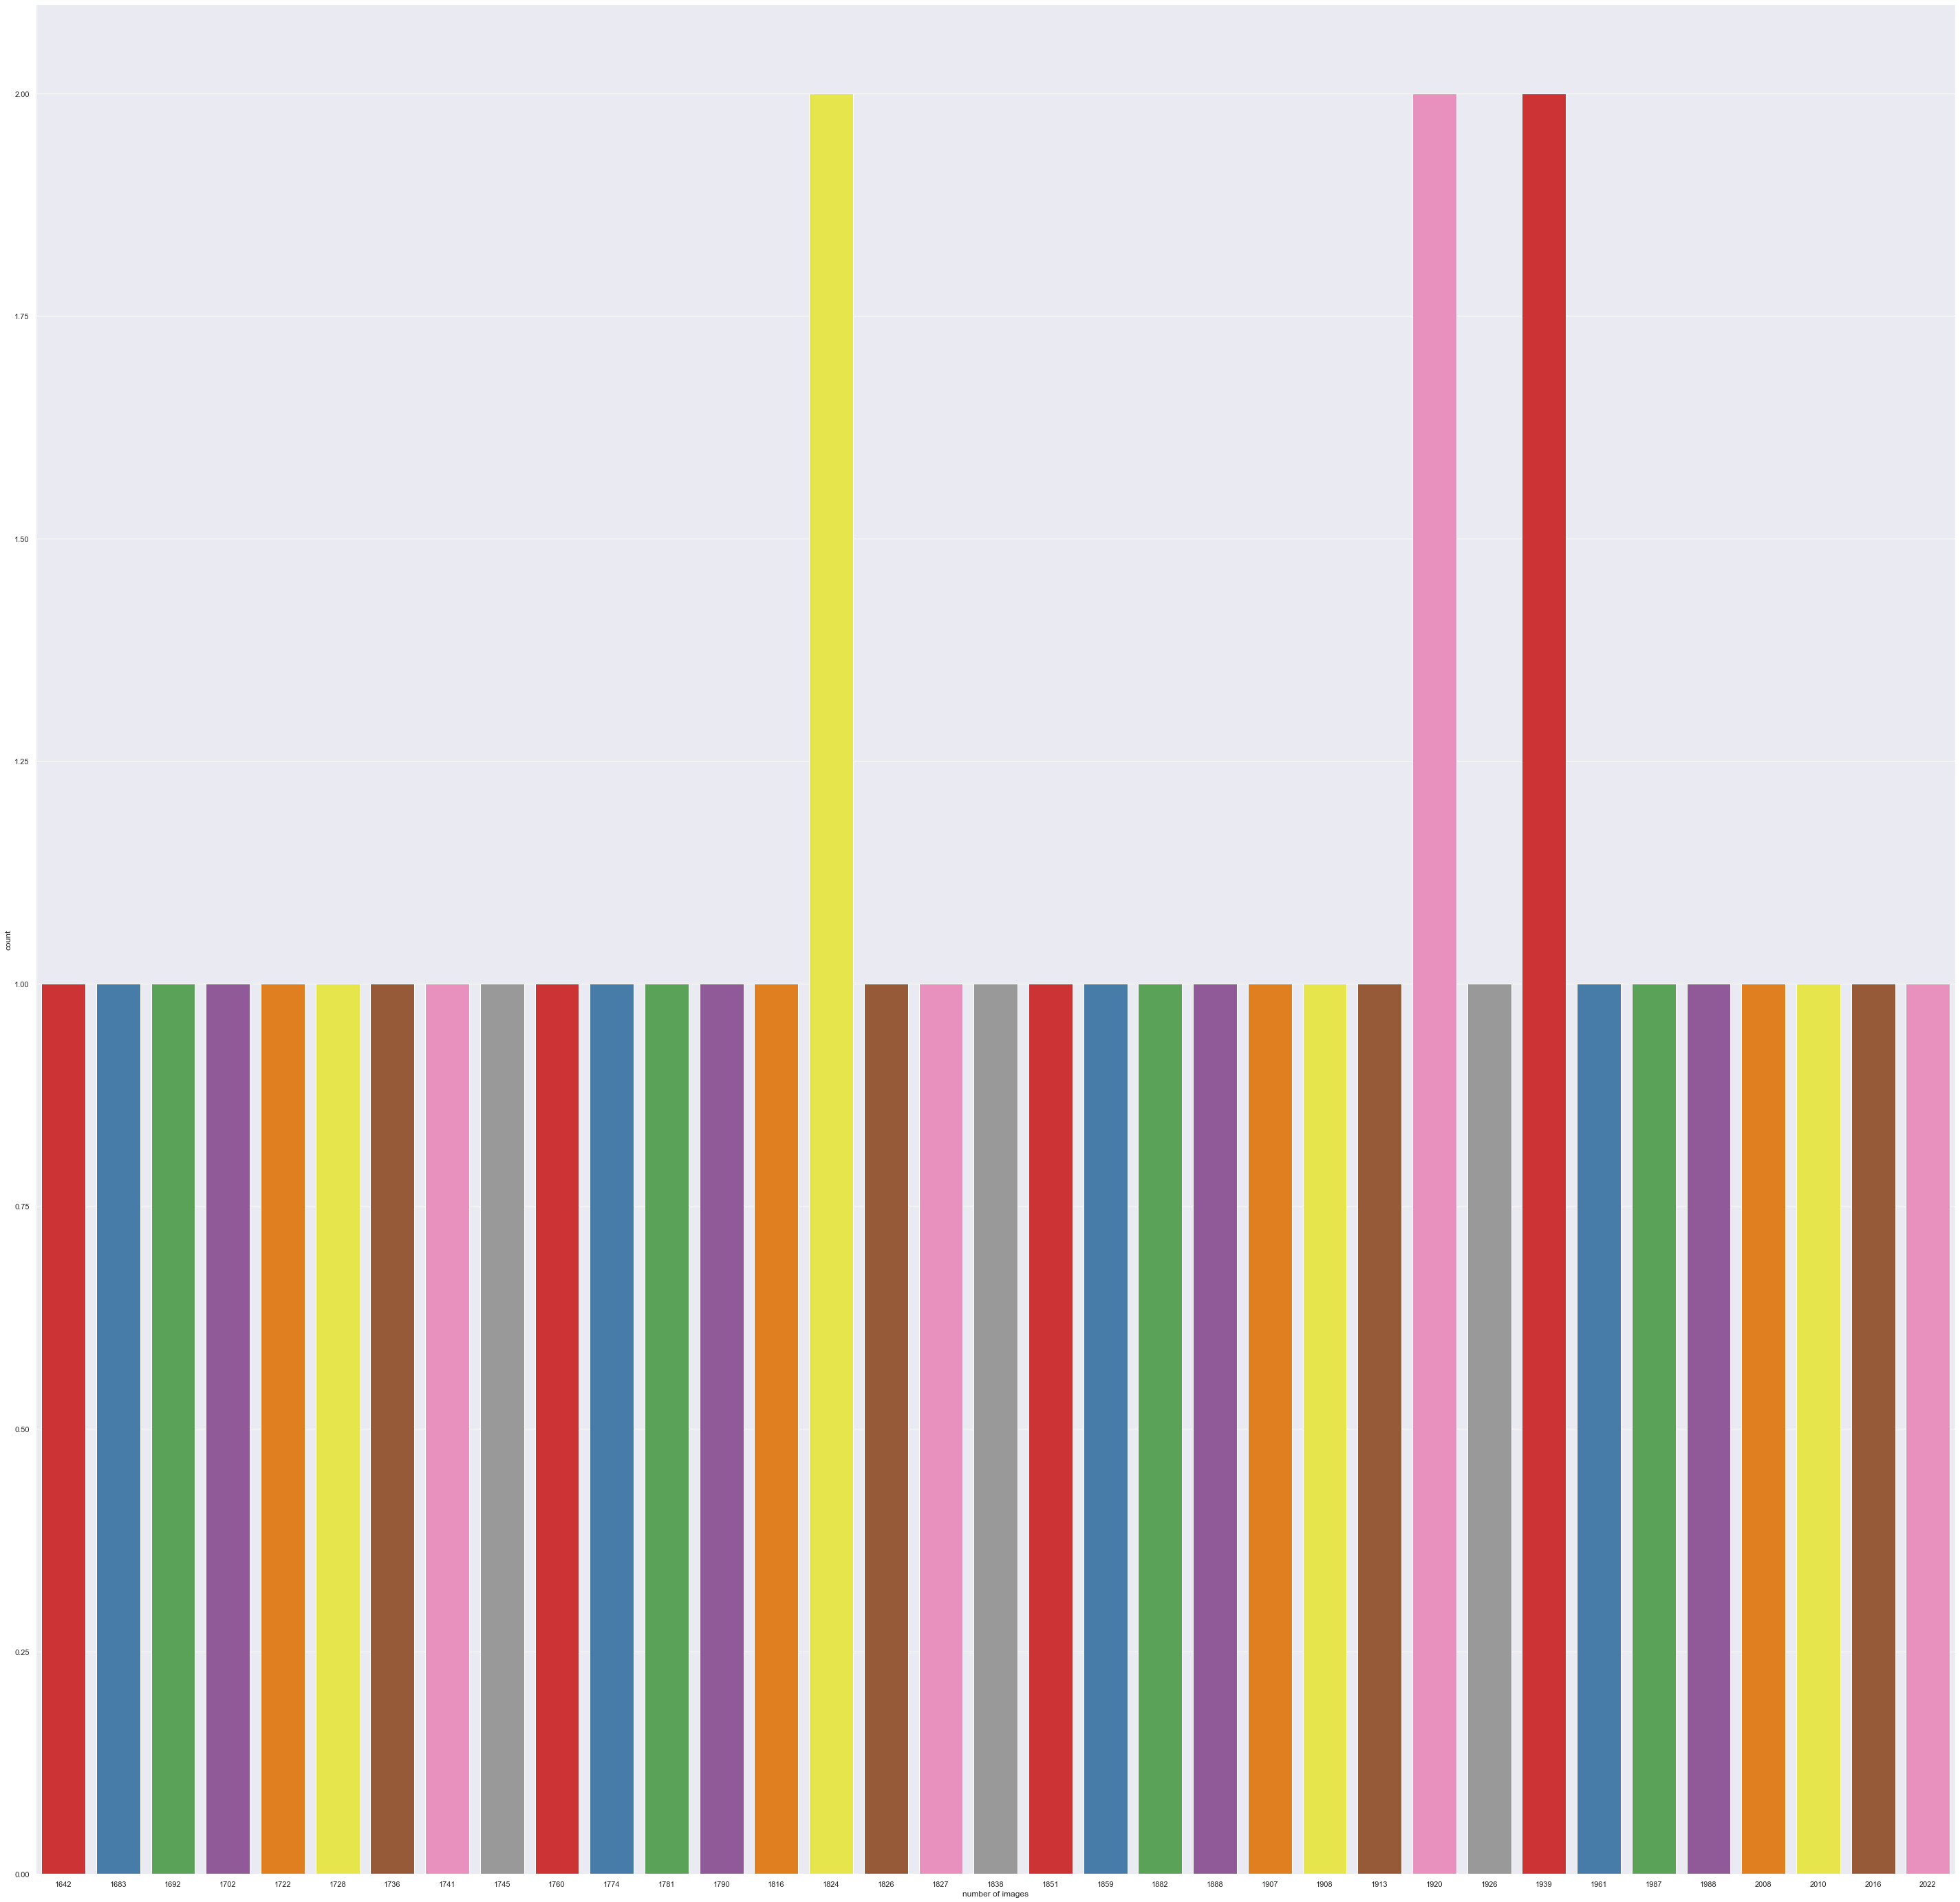

In [6]:
sns.set(rc={'figure.figsize':(50,50)})
ax = sns.countplot(x="number of images",data=img_each_class, palette="Set1")

In [7]:
batch_size = 20

In [8]:
traindata_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2,
                                                               shear_range=0.2, horizontal_flip=True, validation_split=0.2)
validdata_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

testdata_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [9]:
train_data_generator=traindata_gen.flow_from_directory(train_image_path,batch_size=batch_size,class_mode="categorical",
                                                           target_size=(224,224),color_mode="rgb",shuffle=True )

Found 70295 images belonging to 38 classes.


In [10]:
valid_data_generator=validdata_gen.flow_from_directory(valid_image_path,batch_size=batch_size,class_mode="categorical",
                                                           target_size=(224,224),color_mode="rgb",shuffle=True )

Found 17572 images belonging to 38 classes.


In [11]:
test_data_generator=testdata_gen.flow_from_directory(test_image_path,batch_size=batch_size,class_mode="categorical",
                                                           target_size=(224,224),color_mode="rgb",shuffle=False )

Found 33 images belonging to 1 classes.


In [12]:
class_dict = train_data_generator.class_indices
class_list = list(class_dict.keys())
class_list

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [13]:
train_number = train_data_generator.samples
valid_number = valid_data_generator.samples

In [14]:
#Model 

def inceptionnet(x,filters):
    
    #(1x1) layer
    layer1=Conv2D(filters=filters[0],kernel_size=(1,1),strides=1,padding="same",activation="relu")(x)
    
    #(3x3) layer
    layer2=Conv2D(filters=filters[1][0],kernel_size=(1,1),strides=1,padding="same",activation="relu")(x)
    

    layer2=Conv2D(filters=filters[1][1],kernel_size=(1,1),strides=1,padding="same",activation="relu")(layer2)
    
    #(5x5) layer
    
    layer3=Conv2D(filters=filters[2][0],kernel_size=(5,5),strides=1,padding="same",activation="relu")(x)
    
    layers=Conv2D(filters=filters[2][1],kernel_size=(5,5),strides=1,padding="same",activation="relu")(layer3)
    
    
    
    layer4=MaxPooling2D(pool_size=(3,3),strides=1,padding="same")(x)
    layer4=Conv2D(filters=filters[3],kernel_size=(1,1),strides=1,padding="same",activation="relu")(layer4)
    
    
    return Concatenate(axis=-1)([layer1,layer2,layer3,layer4])
    
    
def helperfunction(x,name=None):
    
    layer=AveragePooling2D(pool_size=(5,5),strides=3,padding="valid")(x)
    
    layer=Conv2D(filters=128,kernel_size=(1,1),strides=1,padding="same",activation="relu")(layer)
    
    layer=Flatten()(layer)
    
    layer=Dense(units=256,activation="relu")(layer)
    
    layer=Dropout(0.4)(layer)
    layer=Dense(units=38,activation="softmax",name=name)(layer)
    
    return layer
    
       
def googlenet():
    
    #taking layer input
    inputlayer=Input(shape=(224,224,3))
    
    #layer_1
    layer=Conv2D(filters=64,kernel_size=(7,7),strides=1,padding="same",activation="relu")(inputlayer)
    
    layer=MaxPooling2D(pool_size=(3,3),strides=2,padding="same")(layer)
    
    layer=BatchNormalization()(layer)
    
    #layer_2
    layer=Conv2D(filters=64,kernel_size=(1,1),strides=1,padding="same",activation="relu")(layer)
    
    layer=Conv2D(filters=192,kernel_size=(3,3),strides=1,padding="same",activation="relu")(layer)
    
    layer=BatchNormalization()(layer)
    layer=MaxPooling2D(pool_size=(3,3),strides=2,padding="same")(layer)
    
    #layer_3
    layer=inceptionnet(layer,[64,(96,128),(16,32),32])
    layer=inceptionnet(layer,[128,(128,192),(32,96),64])
    layer=MaxPooling2D(pool_size=(3,3),strides=2,padding="same")(layer)
    
    #layer_4
    layer=inceptionnet(layer,[192,(96,208),(16,48),64])
    fnl1=helperfunction(layer,name="fnl1")
    
    layer=inceptionnet(layer,[160,(112,224),(24,64),64])
    layer=inceptionnet(layer,[128,(128,256),(24,64),64])
    layer=inceptionnet(layer,[112,(144,288),(32,64),64])
    fnl2=helperfunction(layer,name="fnl2")
    
    layer=inceptionnet(layer,[256,(160,320),(32,128),128])
    layer=MaxPooling2D(pool_size=(3,3),strides=2,padding="same")(layer)
    
    
    #layer_5
    layer=inceptionnet(layer,[256,(160,320),(32,128),128])
    layer=inceptionnet(layer,[384,(192,384),(48,128),128])
    layer=AveragePooling2D(pool_size=(7,7),strides=1,padding="same")(layer)
    
    #layer_6
    
    layer=Flatten()(layer)
    layer=Dropout(0.4)(layer)
    layer=Dense(units=256,activation="linear")(layer)
    fnl_lyr=Dense(units=38,activation="softmax",name="fnl_lyr")(layer)
    
    
    model=Model(inputs=inputlayer,outputs=[fnl_lyr,fnl1,fnl2])
    
    return model

In [15]:
model = googlenet()
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 112, 112, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 64) 256         max_pooling2d[0][0]              
_______________________________________________________________________________________

In [16]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [17]:
epochs = 12 
initial_lrate = 0.01

def decay(epoch, steps=50):
    initial_lrate=0.01
    drop = 0.96
    epochs_drop=4
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(learning_rate=initial_lrate, momentum=0.9, nesterov=False)

lr_sc = LearningRateScheduler(decay, verbose=1)

model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'], loss_weights=[1, 0.3, 0.3], optimizer=sgd, metrics=['accuracy'])

    

In [ ]:
history=model.fit(train_data_generator,validation_data=valid_data_generator,
                  steps_per_epoch=(train_number//batch_size)//4,epochs=8,validation_steps=valid_number//batch_size,verbose=1)

Epoch 1/8
878/878 [==============================] - 11424s 13s/step - loss: 4.8547 - fnl_lyr_loss: 3.0709 - fnl1_loss: 2.8278 - fnl2_loss: 3.1183 - fnl_lyr_accuracy: 0.1515 - fnl1_accuracy: 0.2163 - fnl2_accuracy: 0.1409 - val_loss: 6.1272 - val_fnl_lyr_loss: 3.9711 - val_fnl1_loss: 3.5500 - val_fnl2_loss: 3.6372 - val_fnl_lyr_accuracy: 0.1297 - val_fnl1_accuracy: 0.1184 - val_fnl2_accuracy: 0.1092
Epoch 2/8
878/878 [==============================] - 11853s 14s/step - loss: 3.0687 - fnl_lyr_loss: 1.9123 - fnl1_loss: 1.8155 - fnl2_loss: 2.0392 - fnl_lyr_accuracy: 0.4192 - fnl1_accuracy: 0.4535 - fnl2_accuracy: 0.3878 - val_loss: 2.6517 - val_fnl_lyr_loss: 1.7361 - val_fnl1_loss: 1.5038 - val_fnl2_loss: 1.5483 - val_fnl_lyr_accuracy: 0.4931 - val_fnl1_accuracy: 0.5282 - val_fnl2_accuracy: 0.5186
Epoch 3/8
878/878 [==============================] - 12294s 14s/step - loss: 2.2957 - fnl_lyr_loss: 1.4248 - fnl1_loss: 1.3853 - fnl2_loss: 1.5178 - fnl_lyr_accuracy: 0.5575 - fnl1_accuracy: 0.5